## Research Question (Q1)

How has Netflix’s content composition shifted between movies and TV shows over time?

In [18]:
import pandas as pd

# Load Data as relative path
movies_path = "../data/raw/netflix_movies_detailed_up_to_2025.csv"
tv_path = "../data/raw/netflix_tv_shows_detailed_up_to_2025.csv"

movies_df = pd.read_csv(movies_path)
tv_df = pd.read_csv(tv_path)

In [19]:
# Count number of movies per release year
movies_by_year = (
    movies_df
    .groupby("release_year")
    .size()
    .reset_index(name="movie_count")
)

movies_by_year

,release_year,movie_count
0,2010,1000
1,2011,1000
2,2012,1000
3,2013,1000
4,2014,1000
5,2015,1000
6,2016,1000
7,2017,1000
8,2018,1000
9,2019,1000


In [20]:
# Count number of TV shows per release year
tv_by_year = (
    tv_df
    .groupby("release_year")
    .size()
    .reset_index(name="tv_count")
)

tv_by_year

,release_year,tv_count
0,2010,1000
1,2011,1000
2,2012,1000
3,2013,1000
4,2014,1000
5,2015,1000
6,2016,1000
7,2017,1000
8,2018,1000
9,2019,1000


In [21]:
# Merge movie and TV counts by year
yearly_counts = pd.merge(
    movies_by_year,
    tv_by_year,
    on="release_year",
    how="outer"
)

**Observation:**  
The dataset contains a fixed number of movie and TV titles per release year.  
As a result, absolute count comparisons across years are not meaningful.

### Data Limitation and Analytical Decision

Because the dataset includes a fixed number of titles per year, 
this analysis shifts its focus from absolute counts to relative composition 
between movies and TV shows. Due to the dataset's sampling structure, yearly counts of movies and TV shows remain constant,
making ratio-based trend analysis by release year uninformative.

In [22]:
# Change date_added into datetime
movies_df["date_added"] = pd.to_datetime(
    movies_df["date_added"], errors="coerce"
)

tv_df["date_added"] = pd.to_datetime(
    tv_df["date_added"], errors="coerce"
)

In [23]:
movies_df["year_month"] = movies_df["date_added"].dt.to_period("M")
tv_df["year_month"] = tv_df["date_added"].dt.to_period("M")

In [24]:
movies_monthly = (
    movies_df
    .groupby("year_month")
    .size()
    .reset_index(name="movie_count")
)

tv_monthly = (
    tv_df
    .groupby("year_month")
    .size()
    .reset_index(name="tv_count")
)

In [25]:
# Merge movie and TV counts by year month
monthly_counts = pd.merge(
    movies_monthly,
    tv_monthly,
    on="year_month",
    how="outer"
).fillna(0)

In [26]:
monthly_counts["total"] = (
    monthly_counts["movie_count"] + monthly_counts["tv_count"]
)

monthly_counts["movie_ratio"] = (
    monthly_counts["movie_count"] / monthly_counts["total"]
)

monthly_counts["tv_ratio"] = (
    monthly_counts["tv_count"] / monthly_counts["total"]
)

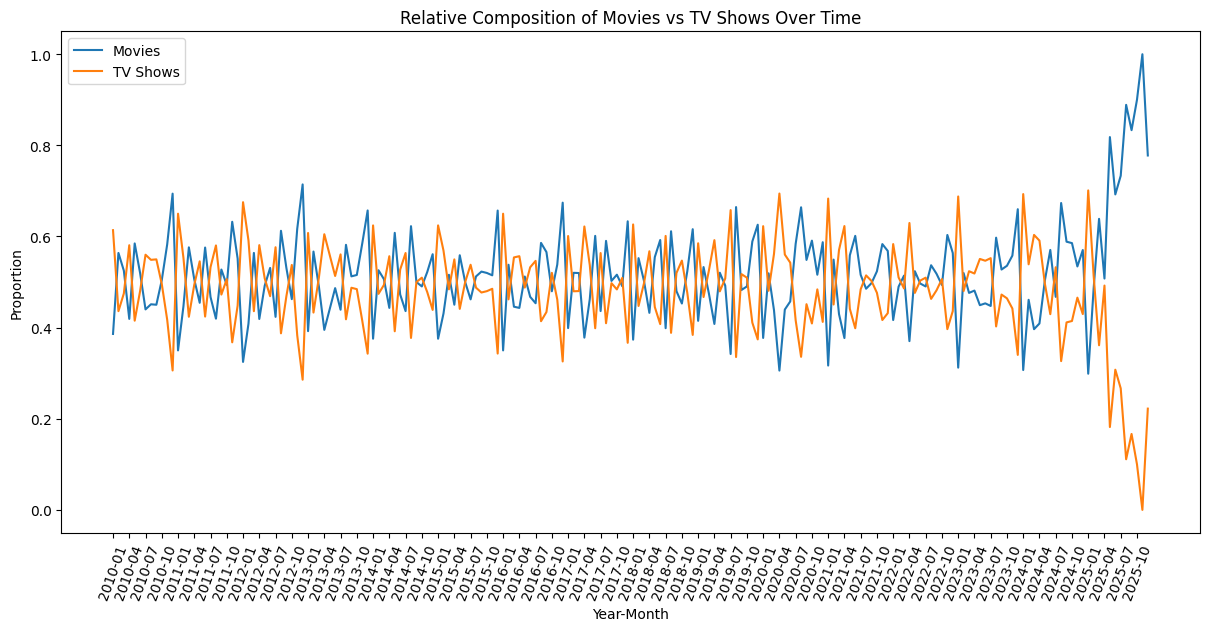

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Plot movie and TV ratios
plt.figure(figsize=(12, 6))

plt.plot(
    monthly_counts["year_month"].astype(str),
    monthly_counts["movie_ratio"],
    label="Movies"
)

plt.plot(
    monthly_counts["year_month"].astype(str),
    monthly_counts["tv_ratio"],
    label="TV Shows"
)

# Set x-axis ticks to every 3 month
tick_positions = np.arange(0, len(monthly_counts), 3)

plt.xticks(tick_positions, rotation=70)
plt.tight_layout()

# chart formating
plt.title("Relative Composition of Movies vs TV Shows Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Proportion")
plt.legend()

plt.show()

### Analysis (Q1: Movies vs TV Shows)
The monthly composition analysis shows that Netflix’s content mix between movies and TV shows has remained relatively balanced over time, with both categories typically accounting for around 40–60% of total additions. While short-term fluctuations are visible at the monthly level—reflecting release scheduling and batch updates—there is no clear long-term structural shift from movies to TV shows across most of the observed period. The sharp divergence in recent months, where movie proportions increase dramatically while TV shows decline, is likely driven by incomplete or uneven data coverage rather than an actual strategic change. Overall, the results suggest stability in Netflix’s content composition, with observed volatility largely attributable to temporal aggregation and data availability limitations.

### Limitation
Monthly ratios are sensitive to short-term release patterns and incomplete data in recent periods, which may exaggerate fluctuations and should not be interpreted as long-term strategic shifts.